The Effect of Conflict duration on Solar Energy Adoption: Analysis of Trade Data



### Objective of the Analysis

The objective of this analysis is to explore the impact of prolonged conflict duration on solar adoption across countries, while also considering their economic status. By grouping countries into categories based on the length of conflict (Continuous, Periodical, or No Conflict) and analyzing their GDP classification, we aim to identify patterns or disparities in the level of solar energy adoption. This can help reveal whether persistent instability hinders renewable energy efforts.

### 🔑 Key Questions

1. **Does prolonged conflict negatively affect solar adoption rates in countries?**
   
2. **How does economic status (e.g., low-income vs. high-income) influence solar adoption under conflict conditions?**
   
3. **Are there notable differences in solar adoption between countries with periodical conflict and those with continuous or no conflict?**

4. **Which countries stand out as exceptions, and why?**

5. **Can we identify patterns or correlations between conflict duration, GDP status, and solar import activity?**

In [9]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
# read dataframe from GitHup
url = "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/UN_comtrade_clean_dataset.xlsx"
df = pd.read_excel(url, engine="openpyxl")
df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False


## Conflict Duration Grouping

Countries are categorized based on real-world conflict patterns into three groups:

- Continuous Conflict: Countries experiencing prolonged and ongoing conflict (e.g., Afghanistan, Libya, Mali, Sudan, Yemen).
- Periodical Conflict: Countries facing intermittent conflict across years (e.g., Iraq, Ukraine, Nigeria).
- No Conflict: Countries with political stability and no major recent conflicts (e.g., Germany, Morocco, Saudi Arabia).

This classification supports the analysis of how the duration of conflict may influence solar adoption trends.


In [17]:
# Define conflict groups
continuous_conflict = [
    "Afghanistan",
    "Syria",
    "Yemen",
    "Sudan",
    "Sudan (...2011)",
    "State of Palestine",
    "Libya",
    "Mali",
]
periodical_conflict = [
    "Iraq",
    "Nigeria",
    "Central African Rep.",
    "Ethiopia",
    "Ukraine",
    "Myanmar",
    "Pakistan",
    "Mozambique",
]
no_conflict = ["Germany", "Morocco", "Rwanda", "Saudi Arabia"]


# Function to assign conflict group
def classify_conflict(country):
    if country in continuous_conflict:
        return "Continuous Conflict"
    elif country in periodical_conflict:
        return "Periodical Conflict"
    elif country in no_conflict:
        return "No Conflict"
    else:
        return "Unknown"


# Apply classification
df["Conflict_Group"] = df["Country"].apply(classify_conflict)

# Save or display the updated DataFrame
df.to_excel("solar_imports_with_conflict_group.xlsx", index=False)
df.head()

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,Conflict_Group
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True,Continuous Conflict
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False,Periodical Conflict
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False,Periodical Conflict
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7.822000e+03,269897.00,False,Periodical Conflict
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.234600e+04,173026.00,False,Periodical Conflict


 ## GDP Data Integration

In [18]:
# Define GDP groups based on the provided information

# GDP groups dictionary
gdp_groups = {
    "High GDP": ["Germany", "Saudi Arabia"],
    "Medium GDP": ["Iraq", "Libya", "Morocco", "Nigeria", "Pakistan", "Ukraine"],
    "Low GDP": [
        "Afghanistan",
        "Central African Rep.",
        "Ethiopia",
        "Mali",
        "Mozambique",
        "Myanmar",
        "Rwanda",
        "State of Palestine",
        "Sudan",
        "Sudan (...2011)",
        "Syria",
        "Yemen",
    ],
}


# Create mapping from country to GDP status
def map_gdp_status(country):
    for gdp_status, countries in gdp_groups.items():
        if country in countries:
            return gdp_status
    return "Unknown"


# Apply the mapping to create a new column in the DataFrame
df["GDP_Status"] = df["Country"].apply(map_gdp_status)

df.head(3)

,Year,Country_Code,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD,Conflict_Year,Conflict_Group,GDP_Status
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",7.700172e+07,89932863.97,True,Continuous Conflict,Low GDP
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.796000e+03,26489.00,False,Periodical Conflict,Low GDP
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1.654000e+03,61941.00,False,Periodical Conflict,Low GDP


## Product Categorization 

In [19]:
def categorize_product(description):
    description = str(description).lower()
    if "photovoltaic" in description:
        return "PV Modules"
    elif "static converter" in description:
        return "Inverters"
    elif "lead-acid" in description:
        return "Lead-Acid Batteries"
    elif "lithium-ion" in description:
        return "Lithium Batteries"
    elif "portable" in description and "electric" in description:
        return "Solar Lamps"
    elif "electric generator" in description:
        return "Solar Generators"
    else:
        return "Other"


df["Product_Category"] = df["Product_Description"].apply(categorize_product)

 ### **Analysis 1: Trend Comparison by conflict country
 **Line chart showing total import value trends for each conflict group over time.**

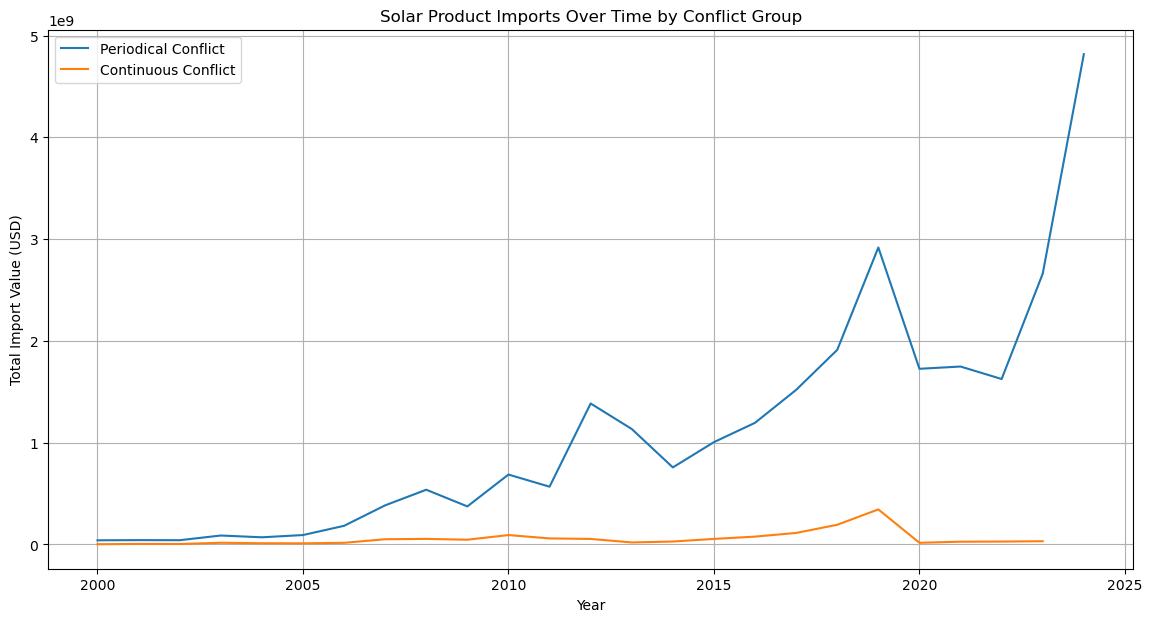

In [20]:
#  Time Trends by Conflict Group (Periodical VS Continuous) ---
plt.figure(figsize=(14, 7))
for group in ["Periodical Conflict", "Continuous Conflict"]:
    group_data = df[df["Conflict_Group"] == group]
    trend = group_data.groupby("Year")["Value_USD"].sum()
    plt.plot(trend.index, trend, label=group)

plt.title("Solar Product Imports Over Time by Conflict Group")
plt.ylabel("Total Import Value (USD)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

### Analysis 2: GDP vs Solar Adoption

- Relationship between economic development and solar adoption

- Differences in this relationship between conflict groups

C:\Users\زينب\AppData\Local\Temp\ipykernel_80608\1659309516.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


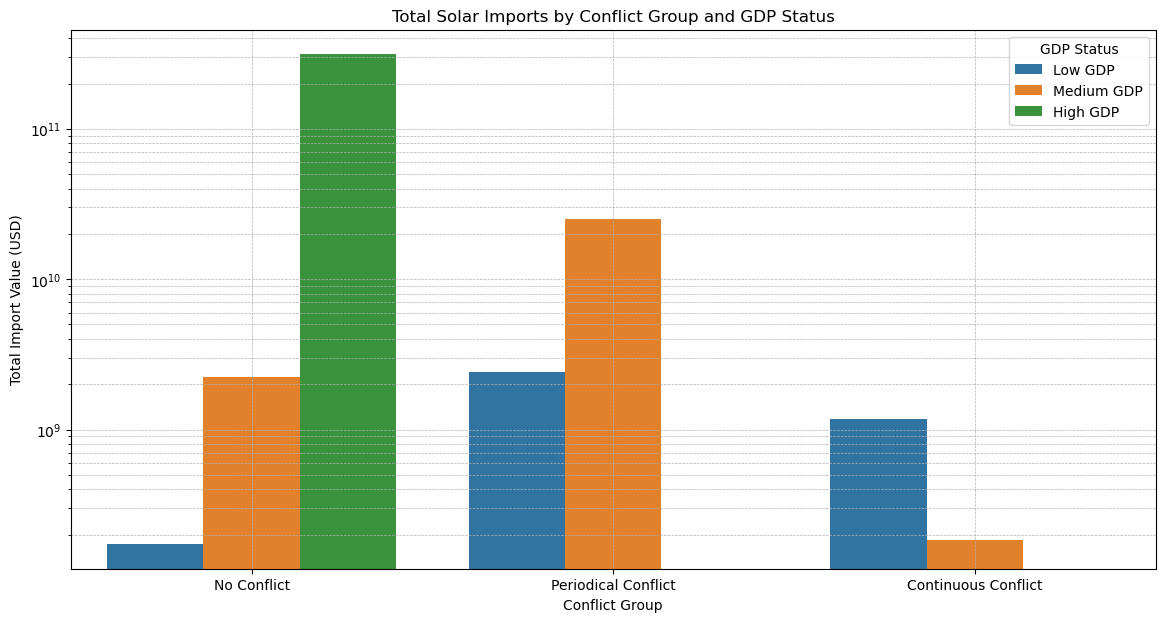

In [21]:
# Solar Adoption by Conflict Group and GDP Status ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df,
    x="Conflict_Group",
    y="Value_USD",
    hue="GDP_Status",
    estimator=sum,
    ci=None,
    order=["No Conflict", "Periodical Conflict", "Continuous Conflict"],
)
plt.title("Total Solar Imports by Conflict Group and GDP Status")
plt.ylabel("Total Import Value (USD)")
plt.xlabel("Conflict Group")
plt.yscale("log")  # Use log scale for better visualization of large differences
plt.legend(title="GDP Status")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## Analysis 3: Product Mix by Conflict Group

- Differences in product preferences between conflict and non-conflict settings

- Identification of which products are most important in conflict zones

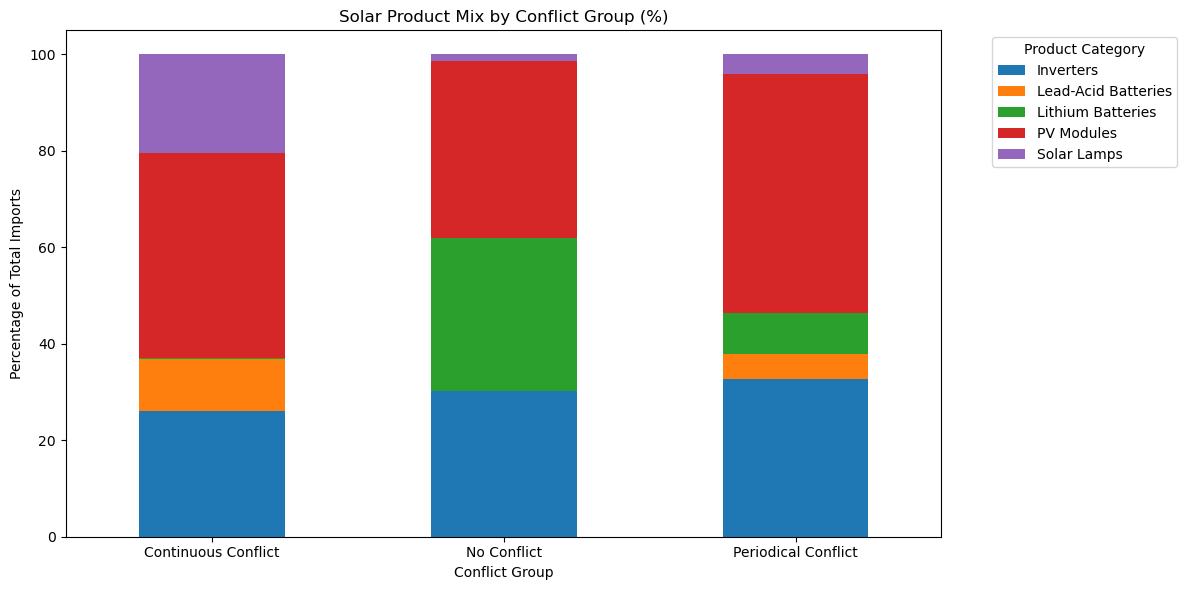

In [ ]:
#  Product Mix Across Conflict Groups ---
product_mix = (
    df.groupby(["Conflict_Group", "Product_Category"])["Value_USD"].sum().unstack()
)

# Normalize to show percentages
product_mix_percent = product_mix.div(product_mix.sum(axis=1), axis=0) * 100

product_mix_percent.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Solar Product Mix by Conflict Group (%)")
plt.ylabel("Percentage of Total Imports")
plt.xlabel("Conflict Group")
plt.xticks(rotation=0)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Analysis 5: Statistical Comparison

-  differences between conflict groups

- Identification of statistically significant patterns

In [ ]:
#  Statistical Summary
conflict_stats = df.groupby(["Conflict_Group", "GDP_Status"]).agg(
    {"Value_USD": ["mean", "median", "sum"], "Net_Weight_kg": "mean"}
)

print("\nStatistical Comparison by Conflict Group and GDP Status:")
print(conflict_stats)


Statistical Comparison by Conflict Group and GDP Status:
                                   Value_USD                              \
                                        mean        median           sum   
Conflict_Group      GDP_Status                                             
Continuous Conflict Low GDP     4.304237e+06  1.383758e+06  1.179361e+09   
                    Medium GDP  6.145910e+06  2.989207e+06  1.843773e+08   
No Conflict         High GDP    1.632752e+09  1.285895e+08  3.134884e+11   
                    Low GDP     2.273031e+06  6.573871e+05  1.727504e+08   
                    Medium GDP  2.523981e+07  6.570057e+06  2.246343e+09   
Periodical Conflict Low GDP     6.936723e+06  1.893903e+06  2.400106e+09   
                    Medium GDP  8.398748e+07  2.161070e+07  2.511226e+10   

                               Net_Weight_kg  
                                        mean  
Conflict_Group      GDP_Status                
Continuous Conflict Low GDP     1.848440

**Histogram of Import Values (USD) by Conflict Group**

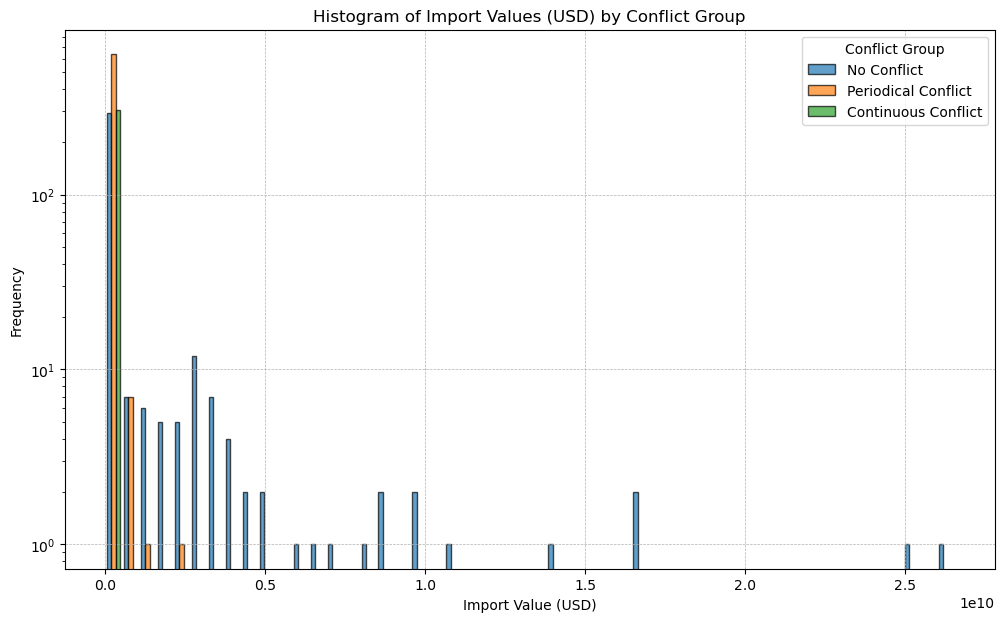

In [ ]:
# Prepare data for each group
groups = ["No Conflict", "Periodical Conflict", "Continuous Conflict"]
data = [df[df["Conflict_Group"] == group]["Value_USD"] for group in groups]

plt.figure(figsize=(12, 7))
plt.hist(
    data,
    bins=50,
    stacked=False,
    label=groups,
    edgecolor="black",
    alpha=0.7,
)
plt.title("Histogram of Import Values (USD) by Conflict Group")
plt.xlabel("Import Value (USD)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.legend(title="Conflict Group")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

C:\Users\زينب\AppData\Local\Temp\ipykernel_71160\3628097749.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled = group_data.resample("Y", on="Year_dt")["Value_USD"].sum()


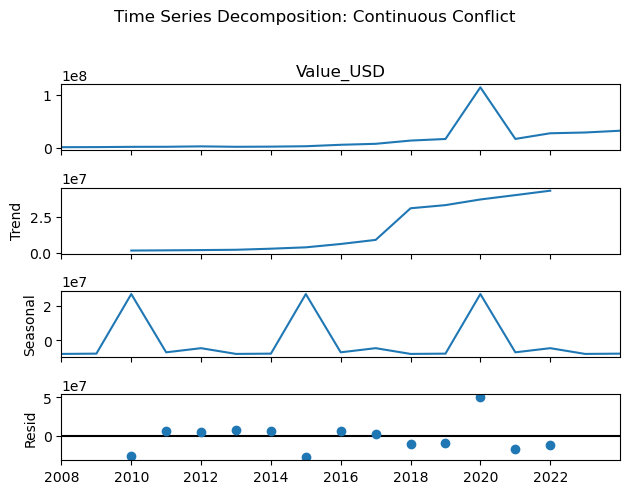

C:\Users\زينب\AppData\Local\Temp\ipykernel_71160\3628097749.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled = group_data.resample("Y", on="Year_dt")["Value_USD"].sum()


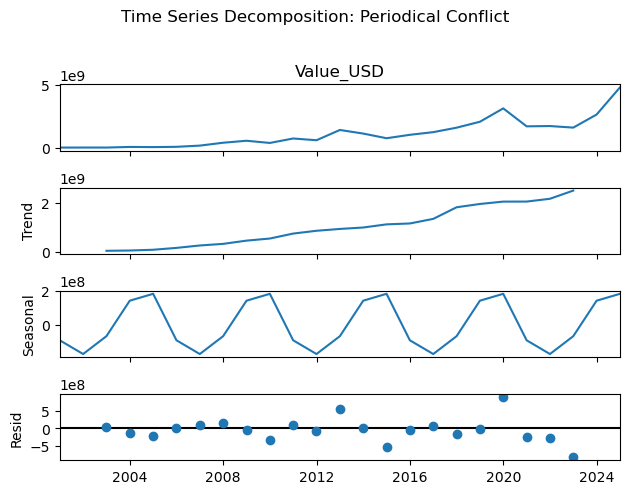

C:\Users\زينب\AppData\Local\Temp\ipykernel_71160\3628097749.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  resampled = group_data.resample("Y", on="Year_dt")["Value_USD"].sum()


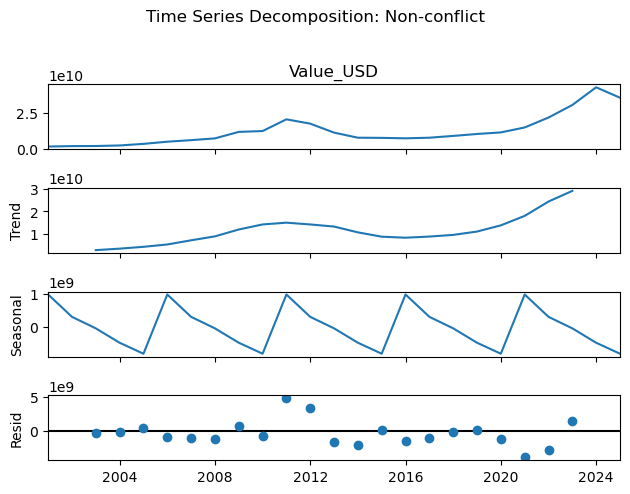

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filter for relevant time period
df_time = df[df["Year"].between(2000, 2025)]

# Decompose trends for each conflict group
for group in df["Conflict_Group"].unique():
    group_data = df_time[df_time["Conflict_Group"] == group].copy()
    # Convert 'Year' to datetime (set to Jan 1st of each year)
    group_data["Year_dt"] = pd.to_datetime(group_data["Year"], format="%Y")
    resampled = group_data.resample("Y", on="Year_dt")["Value_USD"].sum()
    decomposition = seasonal_decompose(resampled, model="additive", period=5)

    fig = decomposition.plot()
    fig.suptitle(f"Time Series Decomposition: {group}", y=1.02)
    plt.tight_layout()
    plt.show()

## Analysis 6: Solar Adoption Intensity Relative to Economic Capacity

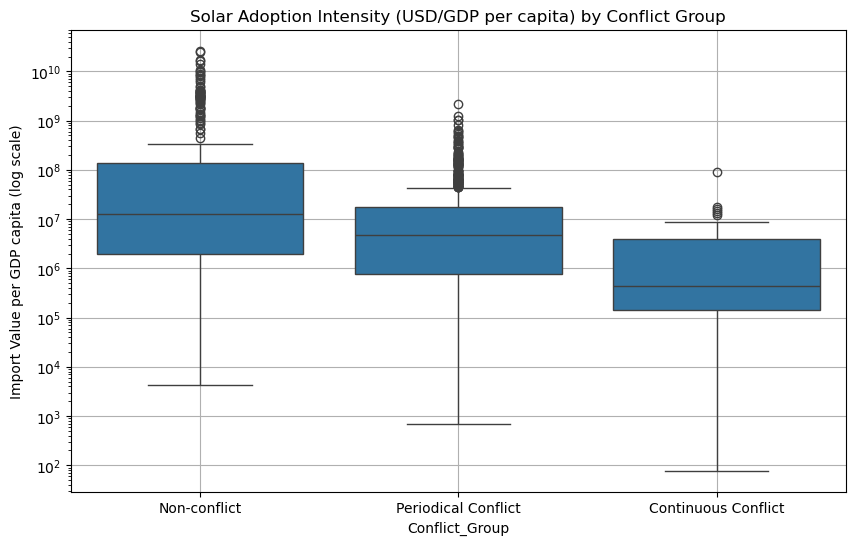

In [ ]:
# Ensure 'GDP_per_capita' exists, otherwise set to a default value (e.g., 1 to avoid division by zero)
if "GDP_per_capita" not in df.columns:
    # If you have GDP and population columns, uncomment and use the following:
    # df["GDP_per_capita"] = df["GDP"] / df["Population"]
    # Otherwise, set to a default value to avoid error
    df["GDP_per_capita"] = 1  # Replace with actual calculation if data is available

# Create conflict intensity metric (Value_USD per GDP capita)
df["Conflict_Intensity"] = df.apply(
    lambda x: x["Value_USD"] / x["GDP_per_capita"] if x["GDP_per_capita"] > 0 else 0,
    axis=1,
)

# Plot intensity by conflict group
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Conflict_Group",
    y="Conflict_Intensity",
    order=["Non-conflict", "Periodical Conflict", "Continuous Conflict"],
)
plt.title("Solar Adoption Intensity (USD/GDP per capita) by Conflict Group")
plt.yscale("log")
plt.ylabel("Import Value per GDP capita (log scale)")
plt.grid(True)

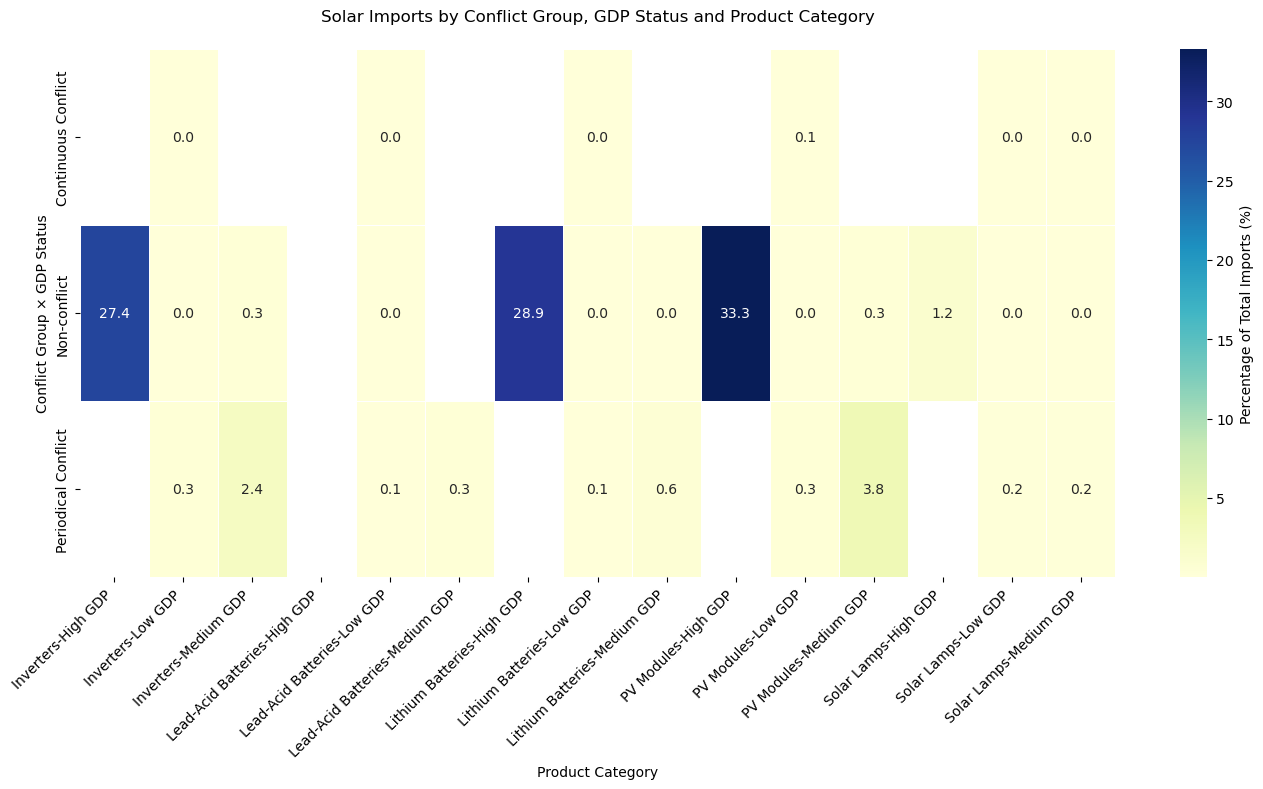

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for heatmap
heatmap_data = (
    df.groupby(["Conflict_Group", "GDP_Status", "Product_Category"])["Value_USD"]
    .sum()
    .unstack()
    .unstack()
)

# Normalize the data to show percentage of total imports
heatmap_data_percent = heatmap_data.div(heatmap_data.sum().sum()) * 100

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data_percent,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Percentage of Total Imports (%)"},
)

# Customize the plot
plt.title("Solar Imports by Conflict Group, GDP Status and Product Category", pad=20)
plt.xlabel("Product Category")
plt.ylabel("Conflict Group × GDP Status")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()